In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
# Read in our ramen data
alpha_soup = pd.read_csv("charity_data.csv")

alpha_soup

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Print out the Country value counts
affiliation_counts = alpha_soup.AFFILIATION.value_counts()
affiliation_counts

In [3]:
# Print out the Country value counts
affiliation_counts = alpha_soup.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1d742777748&gt;

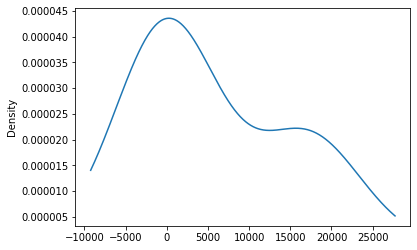

In [9]:
# Visualize the value counts
affiliation_counts.plot.density()

In [24]:
# Determine which values to replace
replace_affiliations = list(affiliation_counts[affiliation_counts < 100].index)

# Replace in DataFrame
for affiliation in replace_affiliations:
 alpha_soup.AFFILIATION = alpha_soup.AFFILIATION.replace(affiliation,"Other")


# Check to make sure binning was successful
alpha_soup.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [6]:
org_counts = alpha_soup.ORGANIZATION.value_counts()
org_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1d742898688&gt;

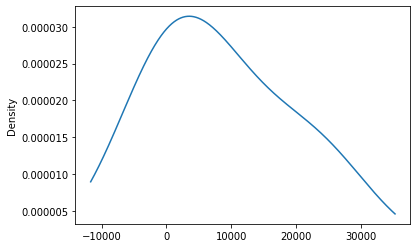

In [10]:
org_counts.plot.density()

In [26]:
# Determine which values to replace
replace_org = list(org_counts[org_counts < 500].index)

# Replace in DataFrame
for organization in replace_org:
 alpha_soup.ORGANIZATION = alpha_soup.ORGANIZATION.replace(organization,"Other")


# Check to make sure binning was successful
alpha_soup.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [12]:
use_counts = alpha_soup.USE_CASE.value_counts()
use_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1d7426aaec8&gt;

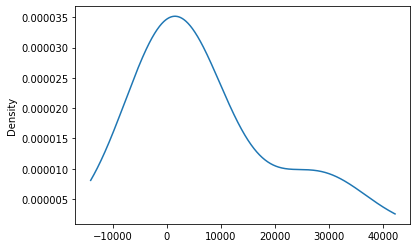

In [11]:
use_counts.plot.density()

In [28]:
# Determine which values to replace
replace_use = list(use_counts[use_counts < 400].index)

# Replace in DataFrame
for use in replace_use:
 alpha_soup.USE_CASE = alpha_soup.USE_CASE.replace(use,"Other")


# Check to make sure binning was successful
alpha_soup.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [41]:
# Print out the Country value counts
amount_counts = alpha_soup.ASK_AMT.value_counts()
amount_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1d748b3c688&gt;

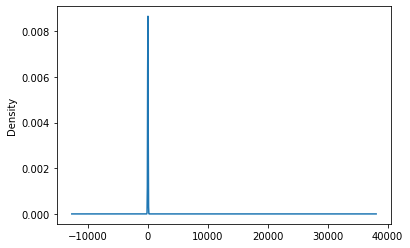

In [43]:
amount_counts.plot.density()

In [34]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(alpha_soup.AFFILIATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Affiliation'])
display(encode_df.head())

df_aff = encode_df

,Affiliation_CompanySponsored,Affiliation_Independent,Affiliation_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [35]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(alpha_soup.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Organization'])
encode_df.head()
df_org = encode_df

In [36]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(alpha_soup.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Use_case'])
encode_df.head()
df_use = encode_df

In [113]:
alpha_soup['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C4120        1
C1370        1
C1900        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [114]:
class_counts = alpha_soup.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C4120        1
C1370        1
C1900        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [116]:
# Determine which values to replace
replace_use = list(class_counts[class_counts < 400].index)

# Replace in DataFrame
for use in replace_use:
 alpha_soup.CLASSIFICATION = alpha_soup.CLASSIFICATION.replace(use,"Other")


# Check to make sure binning was successful
alpha_soup.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [129]:
# Merge the two DataFrames together and drop the Country column
df = pd.concat((df_aff, df_org, df_use,  alpha_soup['ASK_AMT'],  pd.get_dummies(alpha_soup['APPLICATION_TYPE']),alpha_soup['IS_SUCCESSFUL'],), axis=1)# pd.get_dummies(alpha_soup['CLASSIFICATION'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['ASK_AMT'] = scaler.fit_transform(df[['ASK_AMT']])
df.head() 

,Affiliation_CompanySponsored,Affiliation_Independent,Affiliation_Other,Organization_Association,Organization_Other,Organization_Trust,Use_case_Other,Use_case_Preservation,Use_case_ProductDev,ASK_AMT,...,T25,T29,T3,T4,T5,T6,T7,T8,T9,IS_SUCCESSFUL
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.031725,...,0,0,0,0,0,0,0,0,0,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.030536,...,0,0,1,0,0,0,0,0,0,1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.031725,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.031706,...,0,0,1,0,0,0,0,0,0,1
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.030146,...,0,0,1,0,0,0,0,0,0,1


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=.2)


In [208]:
# Define the model - deep neural net
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  25
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: &quot;sequential_27&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 25)                700       
_________________________________________________________________
dense_80 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 13        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [209]:
X_train.shape

(27439, 27)

In [210]:
# Compile the model
from tensorflow.keras.optimizers import SGD, Adam

nn.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

In [212]:
# Train the model
fit_model = nn.fit(X_train.iloc[:100,:], y_train.iloc[:100],epochs=50,  validation_data=(X_test, y_test), batch_size=3000)


Epoch 1/50
1/1 [==============================] - 0s 75ms/step - loss: 0.4576 - accuracy: 0.7600 - val_loss: 1.0287 - val_accuracy: 0.6612
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4575 - accuracy: 0.7700 - val_loss: 1.0317 - val_accuracy: 0.6603
Epoch 3/50
1/1 [==============================] - 0s 35ms/step - loss: 0.4574 - accuracy: 0.7600 - val_loss: 1.0312 - val_accuracy: 0.6609
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 0.4574 - accuracy: 0.7600 - val_loss: 1.0313 - val_accuracy: 0.6611
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.4574 - accuracy: 0.7600 - val_loss: 1.0336 - val_accuracy: 0.6599
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.4574 - accuracy: 0.7600 - val_loss: 1.0310 - val_accuracy: 0.6615
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.4574 - accuracy: 0.7700 - val_loss: 1.0359 - val_accuracy: 0.6598
Epoch 8/50
1/1 [===========

In [213]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 1.0466 - accuracy: 0.6608
Loss: 1.046607255935669, Accuracy: 0.6607871651649475
